## Importing Required Libraries

In [39]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

## Assigning Path for Dataset

In [3]:
TRAIN_DIR = "C:/Users/Andini/Downloads/capstoneeee/archive/eINTERFACE_2021_Image/train"
TEST_DIR = "C:/Users/Andini/Downloads/capstoneeee/archive/eINTERFACE_2021_Image/test"
BATCH_SIZE=64

### Will see how many categories and images present

In [4]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 1896 in folder Anger
For training data, found 1891 in folder Disgust
For training data, found 1922 in folder Fear
For training data, found 1922 in folder Happiness
For training data, found 1922 in folder Sadness
For training data, found 1922 in folder Surprise


In [5]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 237 in folder Anger
For testing data, found 237 in folder Disgust
For testing data, found 241 in folder Fear
For testing data, found 241 in folder Happiness
For testing data, found 241 in folder Sadness
For testing data, found 241 in folder Surprise


### Will see some random images withe their labels

In [6]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [7]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)


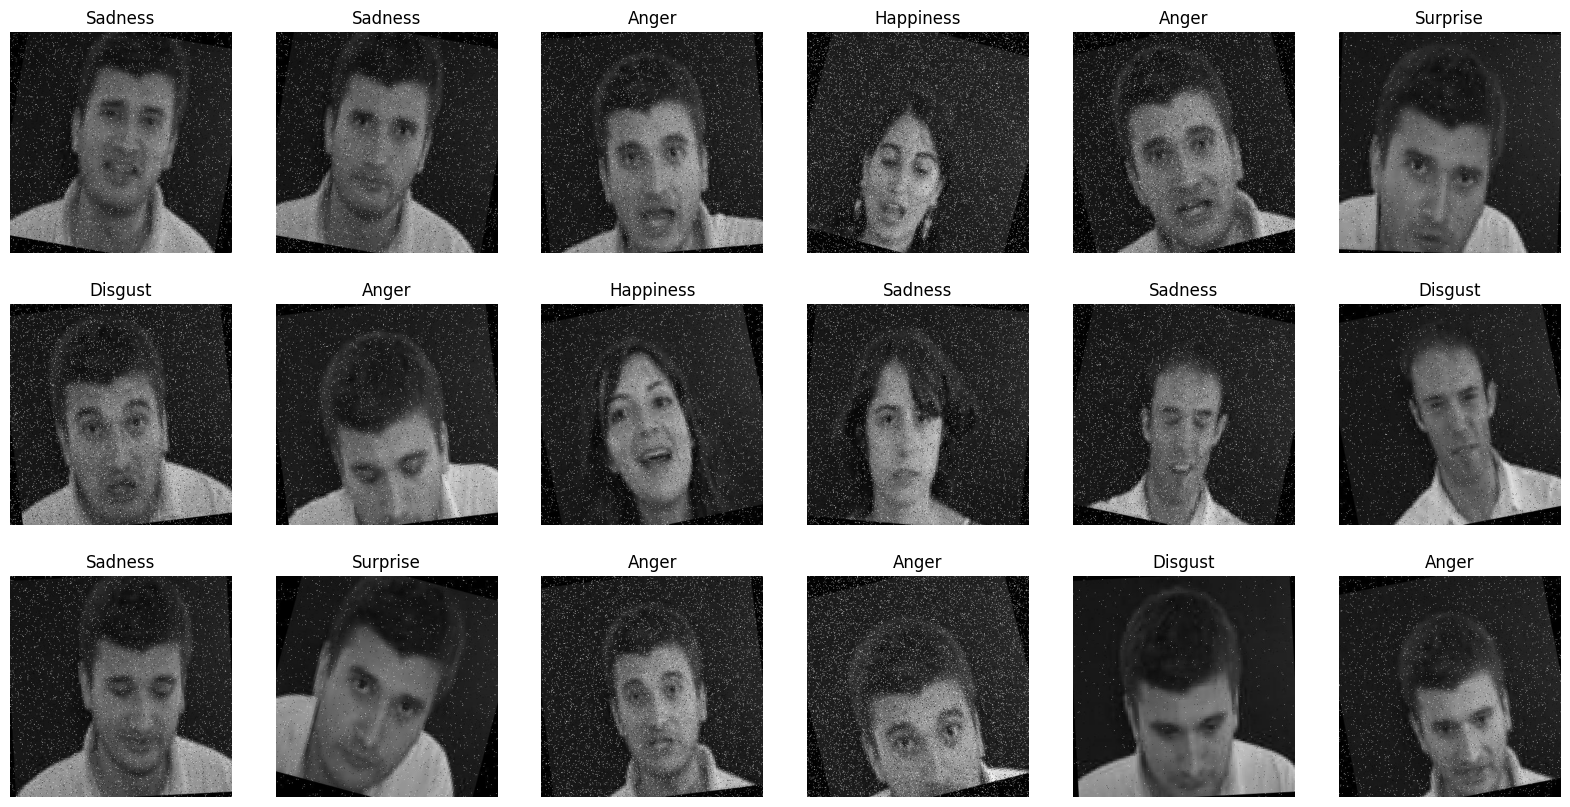

In [8]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="C:/Users/Andini/Downloads/capstoneeee/archive/eINTERFACE_2021_Image/train/", target_class=class_name)

### Preparing data for training

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 11475 images belonging to 6 classes.
Found 1438 images belonging to 6 classes.


### Basic model building (CNN Classifier)

In [10]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
## model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [37]:
#Fitting Model
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("model_weights8.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# early_stopping = EarlyStopping(monitor='val_loss',
#                                min_delta=0,
#                                #patience=3,
#                                patience=3,
#                                verbose=1,
#                                restore_best_weights=True)

# reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
#                                         # factor=0.2,
#                                         factor=0.1,
#                                         #patience=3,
#                                         patience=3,
#                                         verbose=1,
#                                         min_delta=0.001)

callbacks_list = [checkpoint]


In [16]:
history = classifier.fit(training_set,
                         epochs = 80,
                         validation_data = test_set)


classifier.save('model2.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/80
180/180 [==============================] - 217s 1s/step - loss: 1.7567 - accuracy: 0.2268 - val_loss: 1.6434 - val_accuracy: 0.3268
Epoch 2/80
180/180 [==============================] - 62s 344ms/step - loss: 1.5582 - accuracy: 0.3716 - val_loss: 1.4321 - val_accuracy: 0.4207
Epoch 3/80
180/180 [==============================] - 58s 322ms/step - loss: 1.3918 - accuracy: 0.4437 - val_loss: 1.2858 - val_accuracy: 0.4819
Epoch 4/80
180/180 [==============================] - 59s 325ms/step - loss: 1.2280 - accuracy: 0.5136 - val_loss: 1.0914 - val_accuracy: 0.5598
Epoch 5/80
180/180 [==============================] - 59s 326ms/step - loss: 1.1052 - accuracy: 0.5675 - val_loss: 1.0400 - val_accuracy: 0.5793
Epoch 6/80
180/180 [==============================] - 58s 320ms/step - loss: 1.0052 - accuracy: 0.6113 - val_loss: 0.9283 - val_accuracy: 0.6370
Epoch 7/80
180/180 [==============================] - 59s 330ms/step - loss: 0.9198 - accuracy: 0.6458 - val_loss: 0.8827 - val_accu

c:\Users\Andini\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
history = classifier.fit(training_set,
                         epochs = 100,
                         validation_data = test_set)


classifier.save('model3.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/100
180/180 [==============================] - 134s 744ms/step - loss: 0.1674 - accuracy: 0.9403 - val_loss: 0.2967 - val_accuracy: 0.9033
Epoch 2/100
180/180 [==============================] - 91s 505ms/step - loss: 0.1697 - accuracy: 0.9390 - val_loss: 0.3605 - val_accuracy: 0.8783
Epoch 3/100
180/180 [==============================] - 87s 484ms/step - loss: 0.1631 - accuracy: 0.9396 - val_loss: 0.3760 - val_accuracy: 0.8818
Epoch 4/100
180/180 [==============================] - 87s 485ms/step - loss: 0.1785 - accuracy: 0.9359 - val_loss: 0.3810 - val_accuracy: 0.8762
Epoch 5/100
180/180 [==============================] - 92s 511ms/step - loss: 0.1636 - accuracy: 0.9413 - val_loss: 0.4214 - val_accuracy: 0.8602
Epoch 6/100
180/180 [==============================] - 90s 499ms/step - loss: 0.1666 - accuracy: 0.9409 - val_loss: 0.3740 - val_accuracy: 0.8748
Epoch 7/100
180/180 [==============================] - 90s 502ms/step - loss: 0.1612 - accuracy: 0.9447 - val_loss: 0.3186 

In [38]:


history = classifier.fit(training_set,
                         steps_per_epoch=training_set.n//training_set.batch_size,
                         epochs = 51,
                         validation_data = test_set,
                         validation_steps=test_set.n//test_set.batch_size,
                         callbacks=callbacks_list)

classifier.save('model8.h5')  # creates a HDF5 file 'my_model.h5'


Epoch 1/51
179/179 [==============================] - ETA: 0s - loss: 0.0931 - accuracy: 0.9675
Epoch 1: val_accuracy improved from -inf to 0.91193, saving model to model_weights8.h5
179/179 [==============================] - 92s 512ms/step - loss: 0.0931 - accuracy: 0.9675 - val_loss: 0.3205 - val_accuracy: 0.9119
Epoch 2/51


c:\Users\Andini\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


179/179 [==============================] - ETA: 0s - loss: 0.0791 - accuracy: 0.9713
Epoch 2: val_accuracy did not improve from 0.91193
179/179 [==============================] - 97s 545ms/step - loss: 0.0791 - accuracy: 0.9713 - val_loss: 0.3378 - val_accuracy: 0.9119
Epoch 3/51
179/179 [==============================] - ETA: 0s - loss: 0.0946 - accuracy: 0.9665
Epoch 3: val_accuracy improved from 0.91193 to 0.91406, saving model to model_weights8.h5
179/179 [==============================] - 93s 517ms/step - loss: 0.0946 - accuracy: 0.9665 - val_loss: 0.3113 - val_accuracy: 0.9141
Epoch 4/51
179/179 [==============================] - ETA: 0s - loss: 0.0886 - accuracy: 0.9706
Epoch 4: val_accuracy improved from 0.91406 to 0.91974, saving model to model_weights8.h5
179/179 [==============================] - 92s 512ms/step - loss: 0.0886 - accuracy: 0.9706 - val_loss: 0.3300 - val_accuracy: 0.9197
Epoch 5/51
179/179 [==============================] - ETA: 0s - loss: 0.0923 - accuracy: 0

In [34]:
#Fitting Model
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("model_weights7.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               #patience=3,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

# reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
#                                         # factor=0.2,
#                                         factor=0.1,
#                                         #patience=3,
#                                         patience=3,
#                                         verbose=1,
#                                         min_delta=0.001)

callbacks_list = [checkpoint, early_stopping]

epochs = 100



In [25]:
history = classifier.fit(training_set,
                         steps_per_epoch=training_set.n//training_set.batch_size,
                         epochs = epochs,
                         validation_data = test_set,
                         validation_steps=test_set.n//test_set.batch_size,
                         callbacks=callbacks_list)


classifier.save('model4.h5')  # creates a HDF5 file 'my_model.h5' 10 epoch

Epoch 1/10
179/179 [==============================] - ETA: 0s - loss: 0.1084 - accuracy: 0.9630
Epoch 1: val_accuracy improved from -inf to 0.89773, saving model to model_weights4.h5
179/179 [==============================] - 56s 310ms/step - loss: 0.1084 - accuracy: 0.9630 - val_loss: 0.3280 - val_accuracy: 0.8977
Epoch 2/10


c:\Users\Andini\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


179/179 [==============================] - ETA: 0s - loss: 0.1052 - accuracy: 0.9651
Epoch 2: val_accuracy improved from 0.89773 to 0.91264, saving model to model_weights4.h5
179/179 [==============================] - 52s 289ms/step - loss: 0.1052 - accuracy: 0.9651 - val_loss: 0.3277 - val_accuracy: 0.9126
Epoch 3/10
179/179 [==============================] - ETA: 0s - loss: 0.1014 - accuracy: 0.9640
Epoch 3: val_accuracy did not improve from 0.91264
179/179 [==============================] - 53s 295ms/step - loss: 0.1014 - accuracy: 0.9640 - val_loss: 0.3225 - val_accuracy: 0.9055
Epoch 4/10
179/179 [==============================] - ETA: 0s - loss: 0.0880 - accuracy: 0.9676
Epoch 4: val_accuracy improved from 0.91264 to 0.91974, saving model to model_weights4.h5
179/179 [==============================] - 53s 295ms/step - loss: 0.0880 - accuracy: 0.9676 - val_loss: 0.2632 - val_accuracy: 0.9197
Epoch 5/10
179/179 [==============================] - ETA: 0s - loss: 0.1066 - accuracy: 0

In [30]:
history = classifier.fit(training_set,
                         steps_per_epoch=training_set.n//training_set.batch_size,
                         epochs = epochs,
                         validation_data = test_set,
                         validation_steps=test_set.n//test_set.batch_size,
                         callbacks=callbacks_list)


classifier.save('model5.h5')  # creates a HDF5 file 'my_model.h5' 30 epoch

Epoch 1/30
179/179 [==============================] - ETA: 0s - loss: 0.0852 - accuracy: 0.9686
Epoch 1: val_accuracy improved from -inf to 0.91335, saving model to model_weights5.h5
179/179 [==============================] - 55s 304ms/step - loss: 0.0852 - accuracy: 0.9686 - val_loss: 0.3160 - val_accuracy: 0.9134
Epoch 2/30
179/179 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.9683
Epoch 2: val_accuracy did not improve from 0.91335
179/179 [==============================] - 50s 280ms/step - loss: 0.0904 - accuracy: 0.9683 - val_loss: 0.3781 - val_accuracy: 0.8977
Epoch 3/30
179/179 [==============================] - ETA: 0s - loss: 0.1022 - accuracy: 0.9635
Epoch 3: val_accuracy improved from 0.91335 to 0.93182, saving model to model_weights5.h5
179/179 [==============================] - 51s 283ms/step - loss: 0.1022 - accuracy: 0.9635 - val_loss: 0.2176 - val_accuracy: 0.9318
Epoch 4/30
179/179 [==============================] - ETA: 0s - loss: 0.0947 - acc

In [32]:
history = classifier.fit(training_set,
                         steps_per_epoch=training_set.n//training_set.batch_size,
                         epochs = epochs,
                         validation_data = test_set,
                         validation_steps=test_set.n//test_set.batch_size,
                         callbacks=callbacks_list)


classifier.save('model6.h5')  # creates a HDF5 file 'my_model.h5' 50 epoch

Epoch 1/50
179/179 [==============================] - ETA: 0s - loss: 0.0919 - accuracy: 0.9687
Epoch 1: val_accuracy improved from -inf to 0.93537, saving model to model_weights6.h5
179/179 [==============================] - 53s 297ms/step - loss: 0.0919 - accuracy: 0.9687 - val_loss: 0.2563 - val_accuracy: 0.9354
Epoch 2/50
179/179 [==============================] - ETA: 0s - loss: 0.0942 - accuracy: 0.9673
Epoch 2: val_accuracy did not improve from 0.93537
179/179 [==============================] - 53s 298ms/step - loss: 0.0942 - accuracy: 0.9673 - val_loss: 0.3014 - val_accuracy: 0.9254
Epoch 3/50
179/179 [==============================] - ETA: 0s - loss: 0.0935 - accuracy: 0.9684
Epoch 3: val_accuracy did not improve from 0.93537
179/179 [==============================] - 57s 320ms/step - loss: 0.0935 - accuracy: 0.9684 - val_loss: 0.2423 - val_accuracy: 0.9332
Epoch 4/50
179/179 [==============================] - ETA: 0s - loss: 0.0890 - accuracy: 0.9693
Epoch 4: val_accuracy did

In [35]:
history = classifier.fit(training_set,
                         steps_per_epoch=training_set.n//training_set.batch_size,
                         epochs = epochs,
                         validation_data = test_set,
                         validation_steps=test_set.n//test_set.batch_size,
                         callbacks=callbacks_list)


classifier.save('model7.h5')  # creates a HDF5 file 'my_model.h5' 100 epoch

Epoch 1/100
179/179 [==============================] - ETA: 0s - loss: 0.0856 - accuracy: 0.9712
Epoch 1: val_accuracy improved from -inf to 0.93324, saving model to model_weights7.h5
179/179 [==============================] - 247s 1s/step - loss: 0.0856 - accuracy: 0.9712 - val_loss: 0.2643 - val_accuracy: 0.9332
Epoch 2/100
179/179 [==============================] - ETA: 0s - loss: 0.0886 - accuracy: 0.9691
Epoch 2: val_accuracy did not improve from 0.93324
179/179 [==============================] - 53s 298ms/step - loss: 0.0886 - accuracy: 0.9691 - val_loss: 0.3332 - val_accuracy: 0.9126
Epoch 3/100
179/179 [==============================] - ETA: 0s - loss: 0.0789 - accuracy: 0.9714
Epoch 3: val_accuracy did not improve from 0.93324
179/179 [==============================] - 83s 463ms/step - loss: 0.0789 - accuracy: 0.9714 - val_loss: 0.3897 - val_accuracy: 0.8963
Epoch 4/100
179/179 [==============================] - ETA: 0s - loss: 0.0894 - accuracy: 0.9692
Epoch 4: val_accuracy d

### Evaluating the model

In [18]:
classifier.evaluate(test_set)

23/23 [==============================] - 3s 114ms/step - loss: 0.3455 - accuracy: 0.9054


[0.34553244709968567, 0.905424177646637]

Text(0, 0.5, 'Loss')

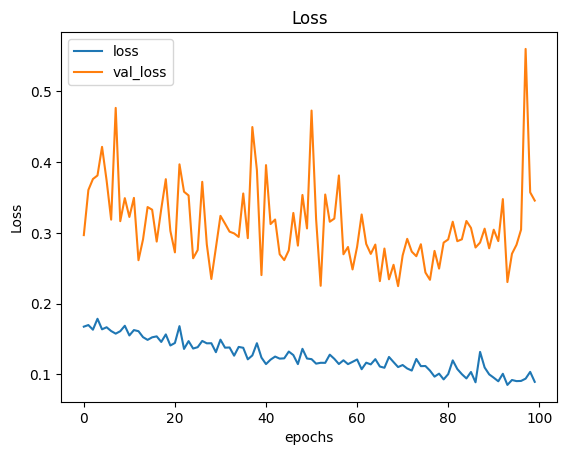

In [19]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

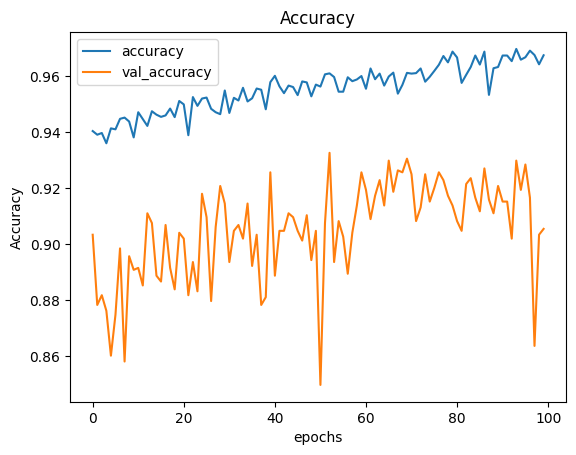

In [20]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [21]:
model_path = "model3.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("C:/Users/Andini/Downloads/capstoneeee/archive/eINTERFACE_2021_Image/test/Anger/18_jpg.rf.0bcb0d6d9667a17eace6abf2e690dece.jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

1/1 [==============================] - 0s 167ms/step


0

In [22]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}

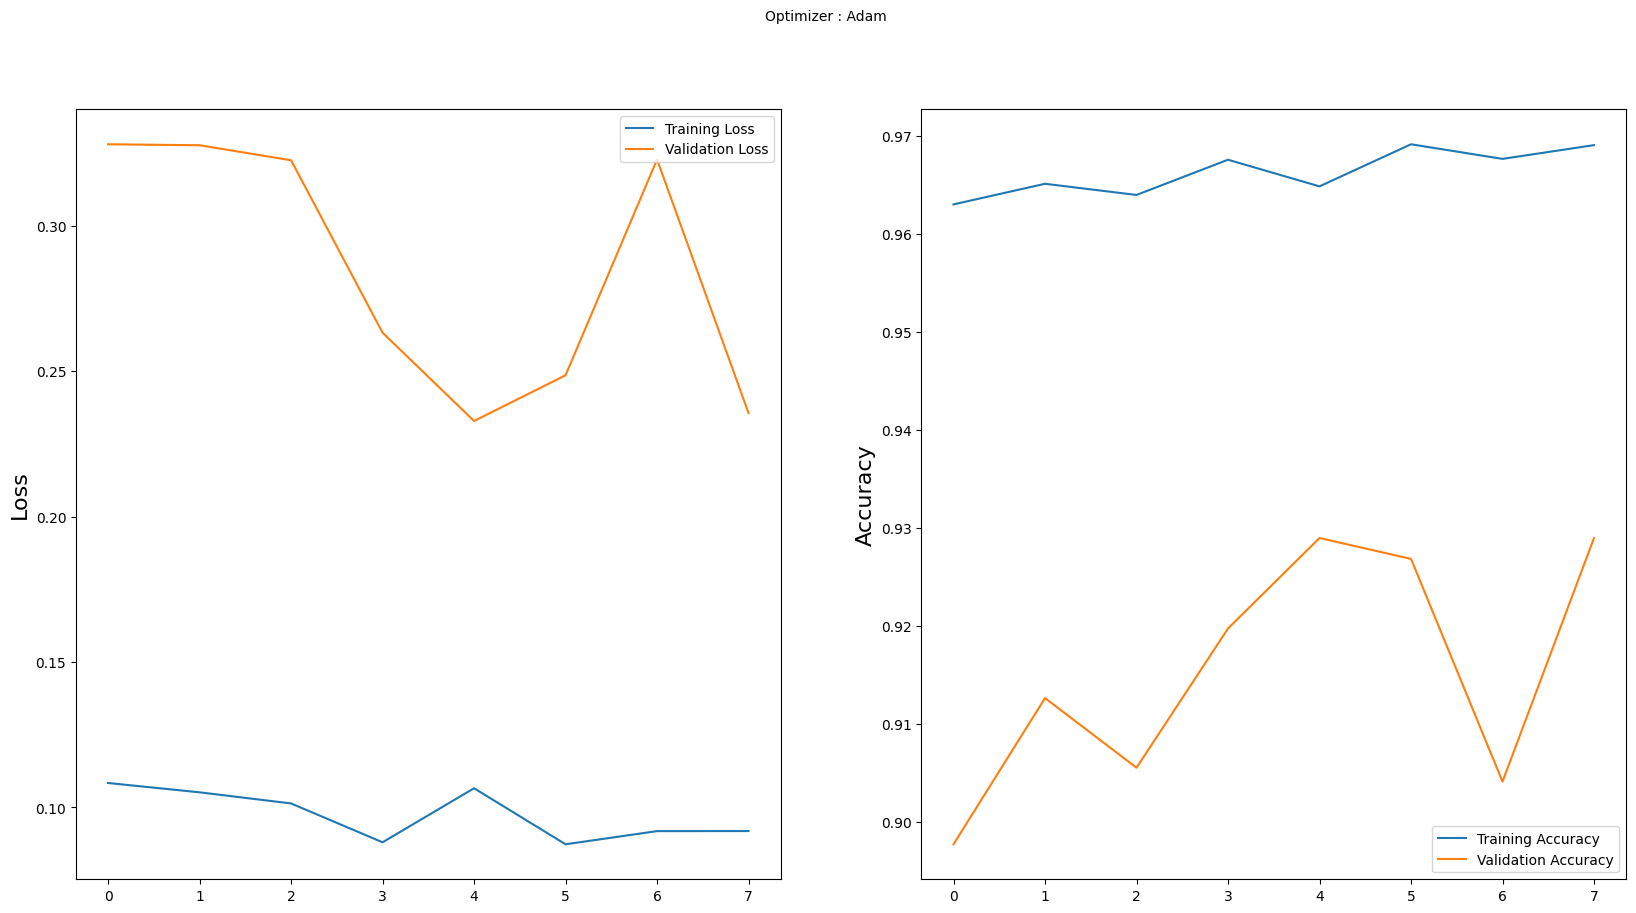

In [27]:
#PLotting Accuracy & Loss
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
           
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy' ], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()